# Аналитика в авиакомпании

**План работы:**
1. [Изучить данные.](#info)
2. [Найти пропуски, дубликаты. Обработать ошибки.](#pp)
3. [Анализ данных. Построить графики.](#an)
4. [Написать вывод.](#conclude)

В предварительной части мы выбрали все необходимые данные из базы. Теперь нужно их визуализировать и сделать необходимые выводы.

<a id='info'></a>

## Изучаем данные

В начале работы как всегда импортируем библиотеки, которые могут понадобиться нам в работе.

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.style.use('seaborn-darkgrid')

Прочитаем данные с помощью библиотека Pandas.

In [2]:
aircrafts = pd.read_csv('/datasets/query_1.csv')
cities = pd.read_csv('/datasets/query_3.csv')

Чтобы не терять время на долгу проверку, автоматизируем процесс. Выведем в цикле сразу общую информацию о датасетах, а также информацию о пропусках и дубликатах.

In [3]:
aircrafts.name = 'Aircrafts'
cities.name = 'Cities'
dfs = [aircrafts, cities]
for df in dfs:
    print(df.name, '\n')
    print('Info:\n')
    print(df.info(),'\n')
    print('Duplicates:\n')
    print(df.duplicated().sum(), '\n')
    print('NaNs:')
    print(df.isna().sum(), '\n')
    print(40*'-' + '\n')

Aircrafts

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None

Duplicates:
0

NaNs:
model             0
flights_amount    0
dtype: int64

--------------------------------------------

Cities

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None

Duplicates:
0

NaNs:
city               0
average_flights    0
dtype: int64

--------------------------------------------



<a id='pp'></a>

Пропусков и дубликатов не обнаружено, типы данных правильные. Можно двигаться дальше.

<a id='an'></a>

## Анализируем данные

Для анализа нам нужны графики. В обоих датасетах одна из переменных — категориальная. Лучше всего подойдёт столбчатая диаграмма, которая покажет распределение количества рейсов по городам и моделям самолётов. Чтобы не копировать несколько раз код, напишем функцию, которая примет несколько базовых параметров и построит `barplot` по ним.

In [5]:
def barplot(x, y, data, title, xlabel, ylabel, figsize=(9,5)): # функция будет принимать столбцы для построения осей
    # координат, датасет, название графика, подписи осей. Размер фигуры будет дефолтным параметром — 
    # при необходимости мы сможем его менять
    plt.figure(figsize=figsize) # задаем размер фигуры
    bar = sns.barplot(x=x,
                      y=y,
                      data=data,
                      palette=sns.cubehelix_palette(start=.5, rot=-.55, n_colors=data.shape[0]),
                      orient='h'
                     ) # строим столбчатую диаграмму, задаем цветовую схему
    plt.title(title,
              color='teal',
              fontsize=18,
              fontweight='bold') # подписываем график
    plt.xlabel(xlabel,
               fontweight='bold',
               fontsize=12) #подписываем ось x
    plt.ylabel(ylabel,
               fontweight='bold',
               fontsize=12); # подписываем ось y

---

<div class="alert alert-block alert-success">
    

### Комментарий от ревьюера v.1 <a class="tocSkip">

Качественно оформленный код! [Используй докстринги для пояснения работы функции. Потом проще будет писать документацию](https://pythonist.ru/docstrings-dokumentirovanie-koda-v-python/).))
    
    
</div>

---

Применим функцию к таблице `aircrafts`, чтобы построить столбчатую диаграмму количества рейсов для каждой модели самолёта.

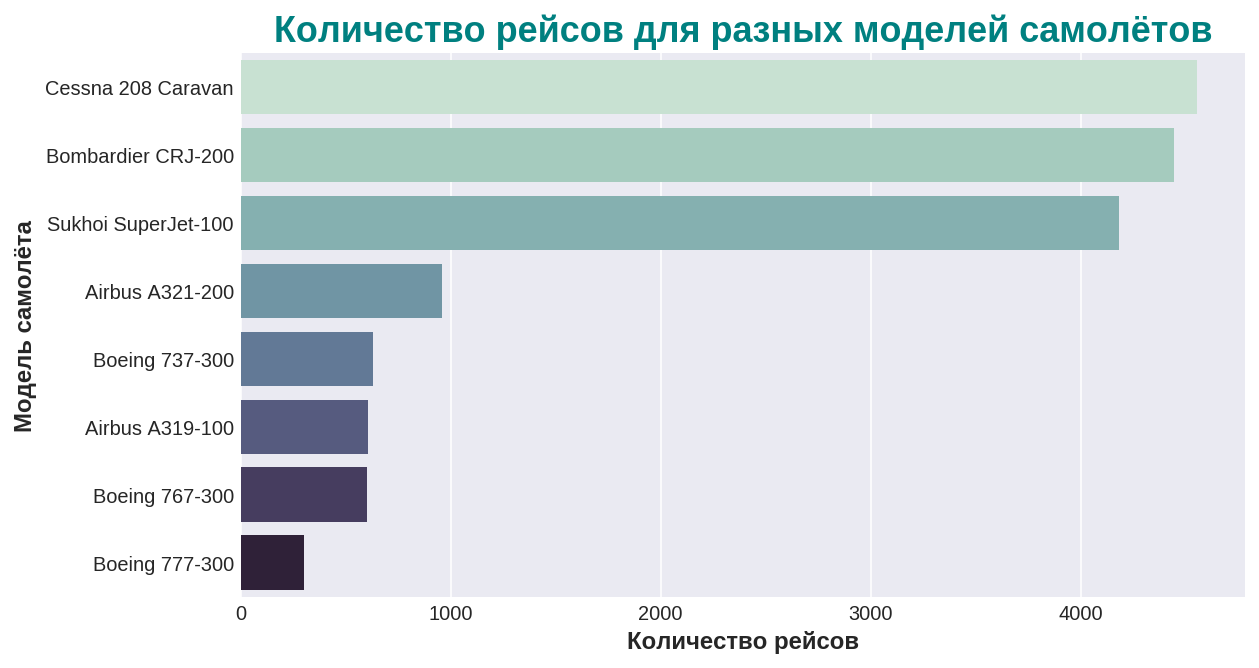

In [6]:
barplot('flights_amount',
        'model', 
        aircrafts.sort_values('flights_amount', ascending=False),
        'Количество рейсов для разных моделей самолётов',
        'Количество рейсов',
        'Модель самолёта')

In [7]:
(
    aircrafts[
        aircrafts['model'].str.contains('Airbus') | 
        aircrafts['model'].str.contains('Boeing')
    ]
    ['flights_amount'].sum() /
    aircrafts['flights_amount'].sum()
)

0.19017500767577525

Результаты довольно неожиданные. Первое место занимает 9-местный региональный **Cessna 208 Caravan**, летающий в небольшие населённые пункты, как правило, на востоке России. Значит, таких небольших рейсов существенно больше, чем тех, которые перевозят много пассажиров за раз.  
  
На втором месте **Bombardier CRJ-200**, тоже региональный самолёт, хоть и уже реактивный, вмещающий не более 50 пассажиров. На третьем — **Sukhoi SuperJet-100** вместимостью около 100 человек. Более вместимые **«Боинги»** и **«Эйрбасы»** пользуются уже куда меньшей популярностью, их доля — всего 19% от всех пассажирских перевозок.  
  
Бóльшую часть рынка занимают *мелкие* и *небольшие* рейсы на сравнительно близкие расстояния.

Ранее написанную функцию применим к таблице `cities` и посмотрим на число рейсов для разных городов.

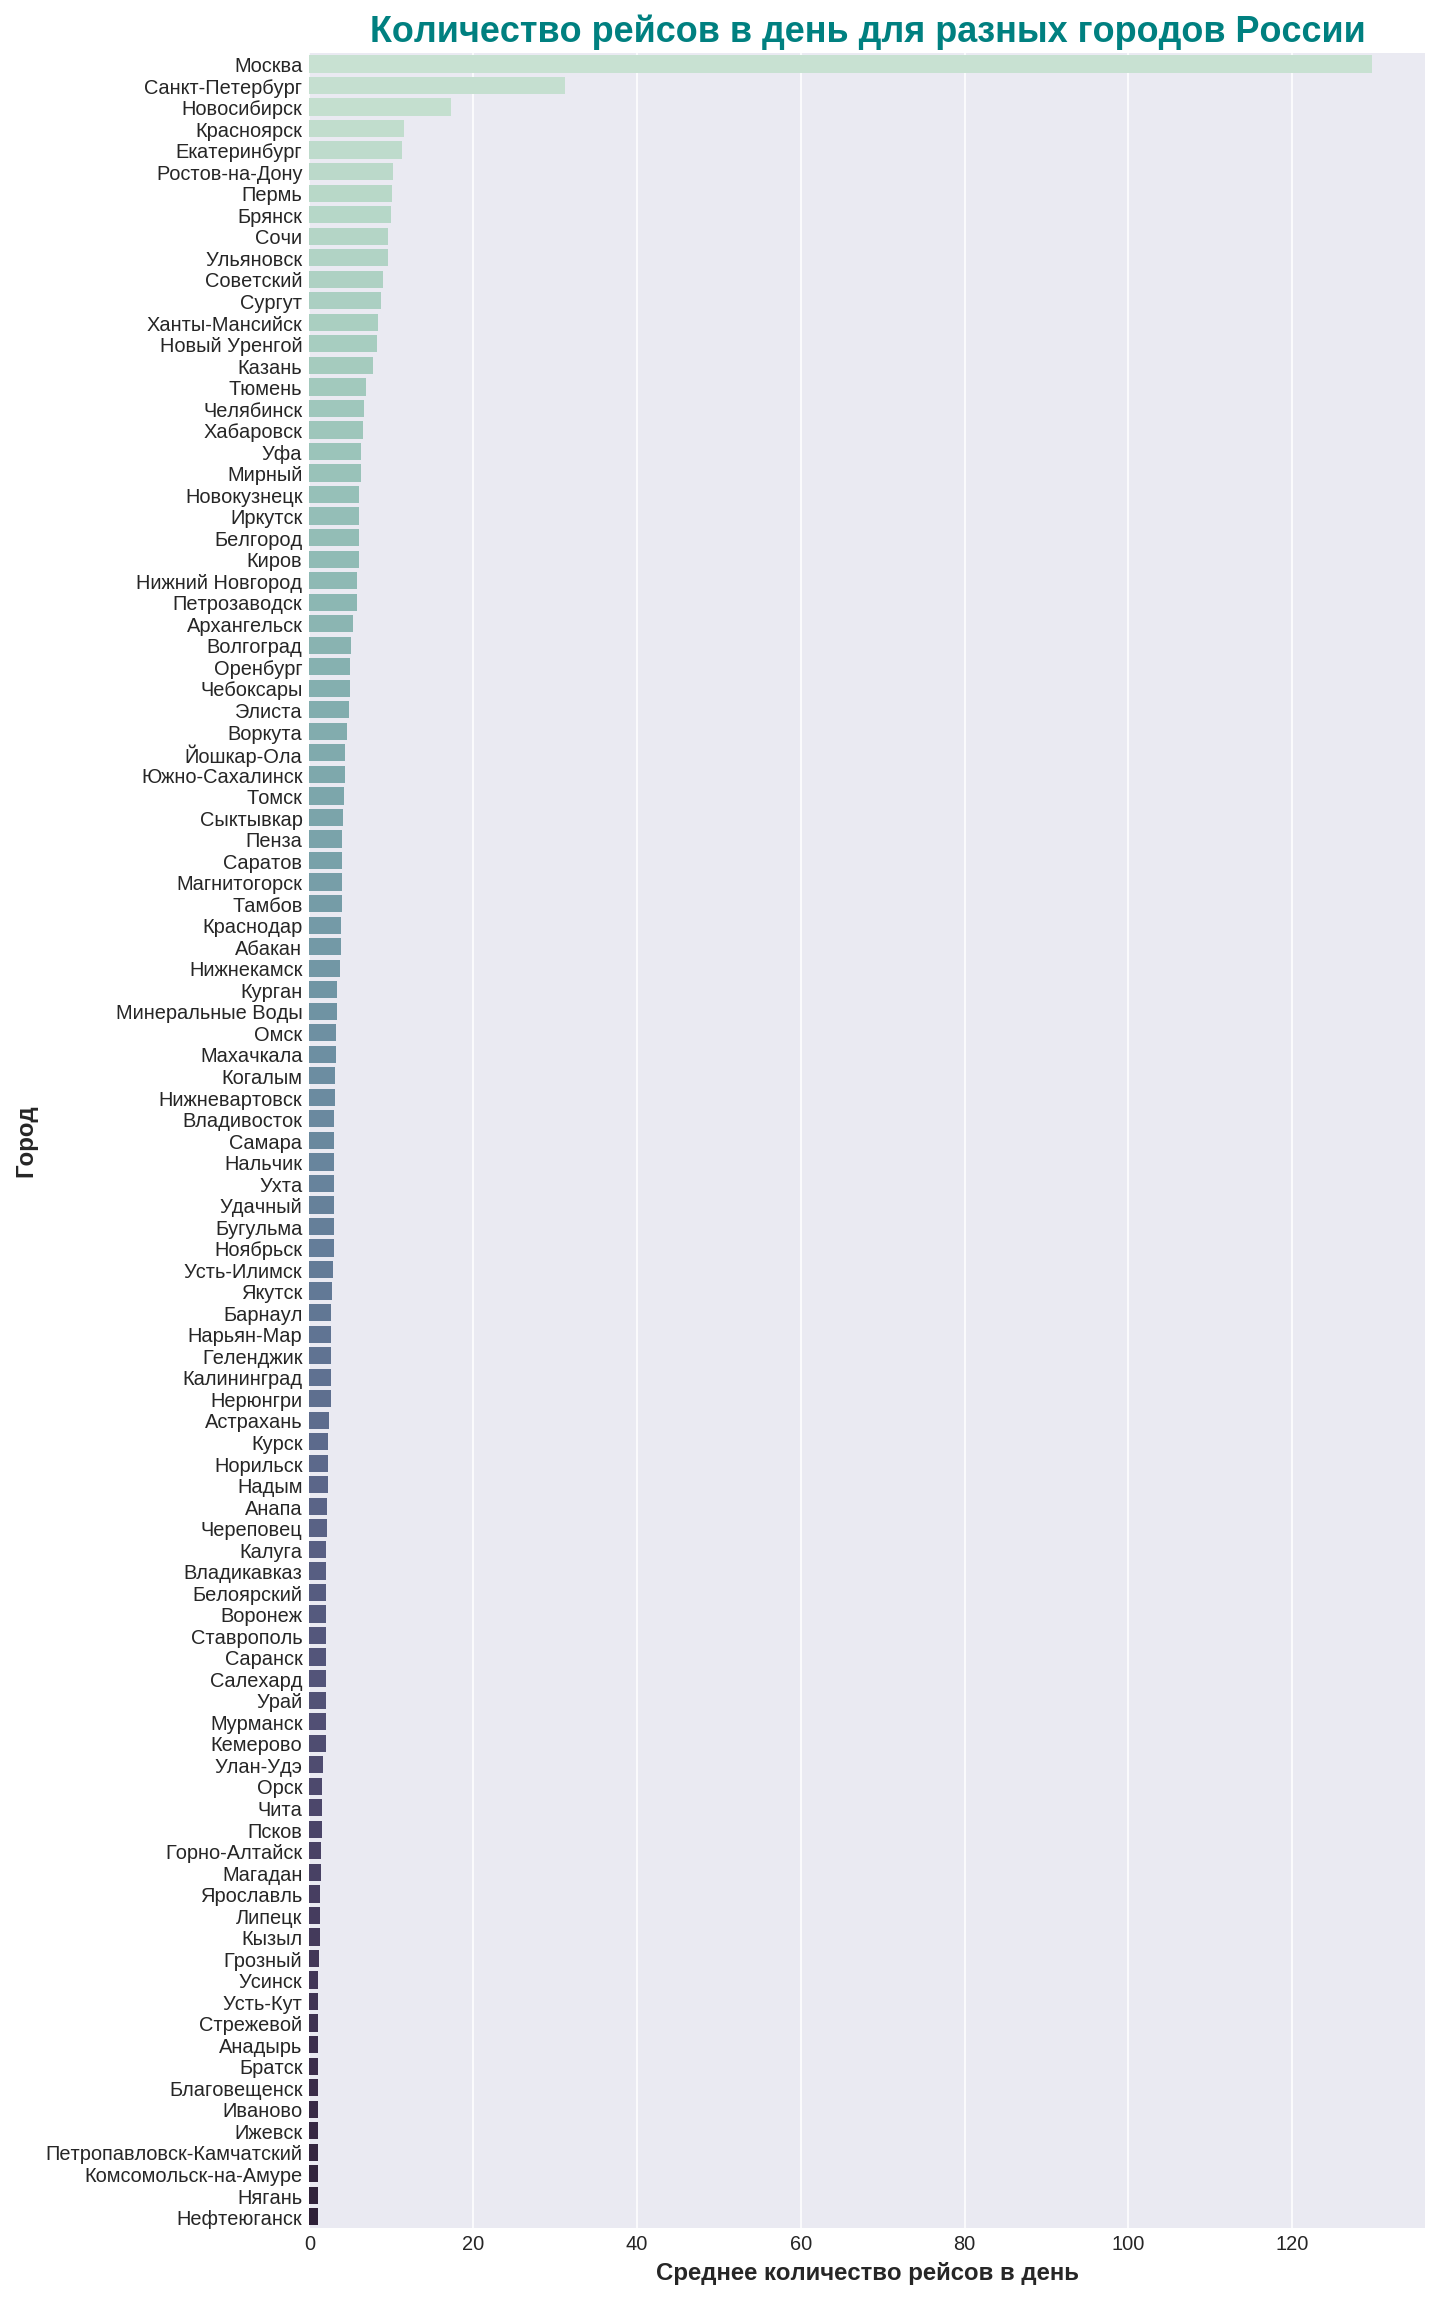

In [8]:
barplot('average_flights',
        'city', 
        cities.sort_values('average_flights', ascending=False),
        'Количество рейсов в день для разных городов России',
        'Среднее количество рейсов в день',
        'Город',
        figsize=(10,20))

Ожидаемо, 1 место заняла **Москва**, за ней идут **Петербург** и города-миллионники — крупные промышленные центры: **Новосибирск, Красноярск, Екатеринбург.**  
  
В большинство городов самолёты летают крайне редко. Но из графика непонятно, насколько таких редких рейсов много или мало. Выделим топ-10 городов по количеству ежедневных рейсов, а остальные города переименуем в «Другой».

In [9]:
cities_top10 = cities.sort_values('average_flights', ascending=False).head(10)

In [10]:
cities.loc[cities['city'].isin(cities_top10['city']) == False, 'city'] = 'Другой'

Ещё раз взглянем на прошлый график, но теперь сжав все редкие рейсы в одну категорию.

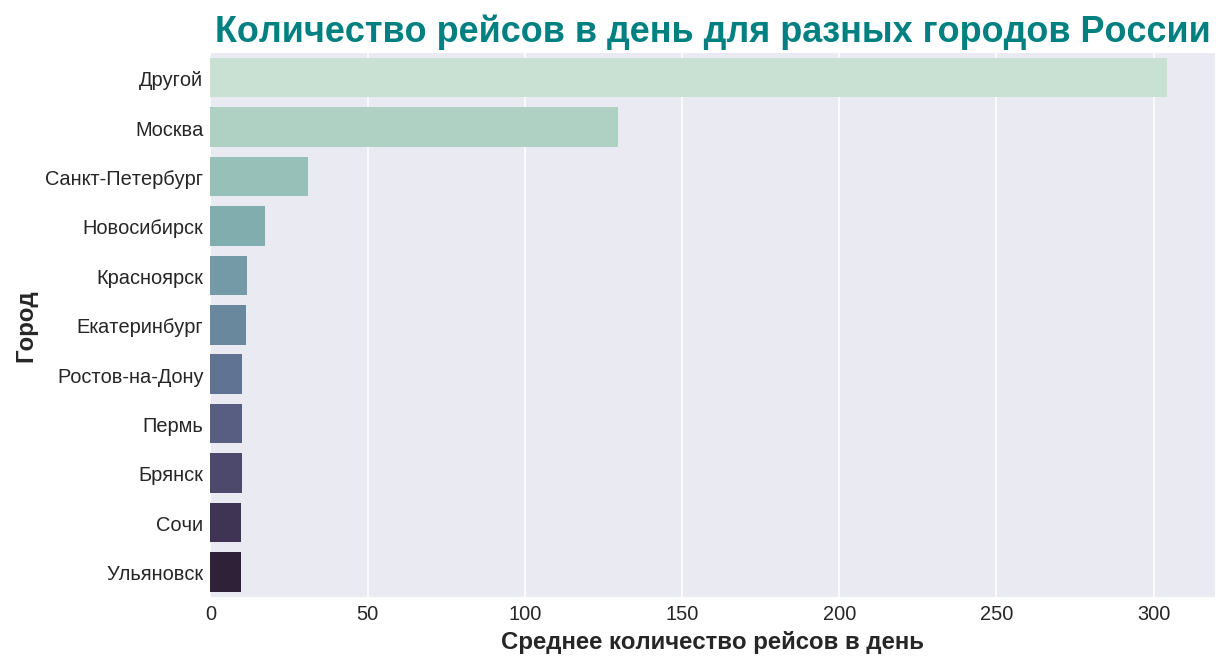

In [11]:
barplot('average_flights',
        'city', 
        cities.groupby('city', as_index=False).sum().sort_values('average_flights', ascending=False),
        'Количество рейсов в день для разных городов России',
        'Среднее количество рейсов в день',
        'Город')

Оказывается, таких рейсов в сумме очень много. Посчитаем, сколько именно.

In [12]:
cities.query('city=="Другой"')['average_flights'].sum() / cities['average_flights'].sum()

0.5482582423669909

**Почти 55%** всех внутренних рейсов приходится на вот такие редкие рейсы, многие из которых выполняются всего раз в день.  
  
Теперь всё сходится. Редкие рейсы летают в непопулярные направления: небольные города на севере и востоке России. Как правило, это промышленные города в нефтяных, угольных, металлургических центрах страны, люди летают туда в командировки. Именно за счёт этих рейсов **Cessna 208 Caravan**, скорее всего, и стал первым по использованию.

Теперь взглянем на топ-10 городов по количеству ежедневных рейсов, используя всё ту же функцию `barplot`.

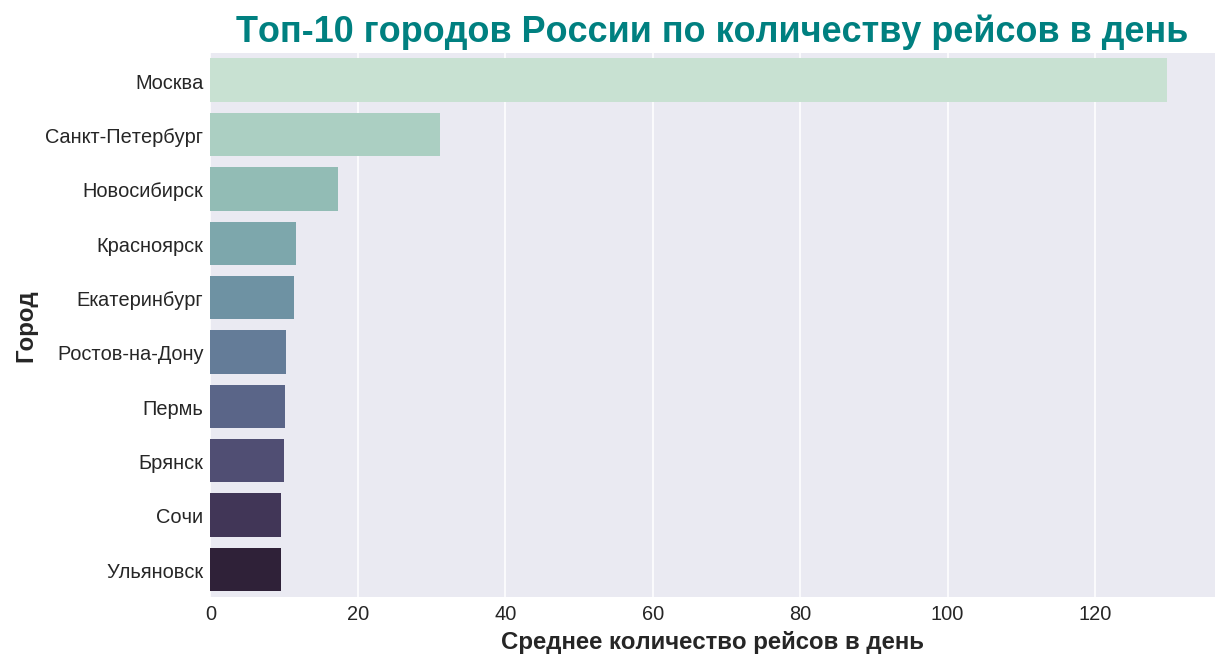

In [13]:
barplot('average_flights',
        'city',
        cities_top10,
        'Топ-10 городов России по количеству рейсов в день',
        'Среднее количество рейсов в день',
        'Город'
        )

Как уже говорилось ранее, в топ-5 ожидаемо входят столицы и промышленные миллионники. Довольно неожиданно 8 место занимает небольшой Брянск, население которого меньше полумиллиона человек.  
  
На сайте flightradar можно увидеть, что из Брянска летают рейсы в 6 городов на юге России. Скорее всего, Брянский аэропорт многие используют как транзитный. То же самое можно сказать и про Ульяновск, который, судя по схеме, связывает восток страны с Сочи и Симферополем.

<a id='conclude'></a>

## Вывод

1. Хотя самые популярные города — это Москва и Петербург, самолёты, летающие в эти города, не самые популярные. Редкие короткие рейсы в небольших отдаленных городах совокупно занимают больше половины рынка внутренних перевозок, поэтому больше всего полётов выполняется на маломестном **Cessna 208 Caravan.**
2. **Больше 80%** рейсов выполняются на самолётах вместимостью **до 100 мест.** Можно говорить о том, что внутренний пассажиропоток в России не очень большой и в основном обеспечивается рабочими поездками.
3. В десятку городов по количеству рейсов в день входят небольшие Брянск и Ульяновск: скорее всего, аэропорты в этих городах используются как транзитные для связи юга и востока России.